In [2]:
#Import Relavent Python3 Libraries

In [3]:
import pandas as pd
import scipy
from matplotlib import pyplot as plot

## Reading the data files given from DrivenData

In [4]:
# File Names
feature_train_file_name = "dengue_features_train.csv"
labels_train_file_name = "dengue_labels_train.csv"

In [5]:
# File Locations
feature_train_file_loc = "Data/" + feature_train_file_name
labels_train_file_loc = "Data/" + labels_train_file_name

Reading the files using Pandas Python Library

In [6]:
# read the data from data files provided by drivendata
features_data = pd.read_csv(feature_train_file_loc, index_col=[0,1,2])
labels_data = pd.read_csv(labels_train_file_loc, index_col=[0,1,2])

Removed unnecesary columns

In [7]:
# Remove week_start_date
features_data.drop(columns="week_start_date", axis=1, inplace=True)

In [8]:
# checking the drop
print(features_data)

                       ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
city year weekofyear                                           
sj   1990 18          0.122600  0.103725  0.198483  0.177617   
          19          0.169900  0.142175  0.162357  0.155486   
          20          0.032250  0.172967  0.157200  0.170843   
          21          0.128633  0.245067  0.227557  0.235886   
          22          0.196200  0.262200  0.251200  0.247340   
          23               NaN  0.174850  0.254314  0.181743   
          24          0.112900  0.092800  0.205071  0.210271   
          25          0.072500  0.072500  0.151471  0.133029   
          26          0.102450  0.146175  0.125571  0.123600   
          27               NaN  0.121550  0.160683  0.202567   
          28          0.192875  0.082350  0.191943  0.152929   
          29          0.291600  0.211800  0.301200  0.280667   
          30          0.150567  0.171700  0.226900  0.214557   
          31               NaN  0.247150

Separating the values according to cities

In [9]:
# there is two cities in the data set(San Juan, Iquitos). We need to divide those data respectively
sj_features_data = features_data.loc['sj']
iq_features_data = features_data.loc['iq']

In [10]:
sj_labels_data = labels_data.loc['sj']
iq_labels_data = labels_data.loc['iq']

In [11]:
# See data structure
print(sj_features_data.head())
print("\n")
print(sj_labels_data.head())

                  ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  precipitation_amt_mm  \
year weekofyear                                                                 
1990 18          0.122600  0.103725  0.198483  0.177617                 12.42   
     19          0.169900  0.142175  0.162357  0.155486                 22.82   
     20          0.032250  0.172967  0.157200  0.170843                 34.54   
     21          0.128633  0.245067  0.227557  0.235886                 15.36   
     22          0.196200  0.262200  0.251200  0.247340                  7.52   

                 reanalysis_air_temp_k  reanalysis_avg_temp_k  \
year weekofyear                                                 
1990 18                     297.572857             297.742857   
     19                     298.211429             298.442857   
     20                     298.781429             298.878571   
     21                     298.987143             299.228571   
     22                     299.518571    

## Cleaning Data

In [12]:
# Find missing values
pd.isnull(sj_features_data).any()

ndvi_ne                                  True
ndvi_nw                                  True
ndvi_se                                  True
ndvi_sw                                  True
precipitation_amt_mm                     True
reanalysis_air_temp_k                    True
reanalysis_avg_temp_k                    True
reanalysis_dew_point_temp_k              True
reanalysis_max_air_temp_k                True
reanalysis_min_air_temp_k                True
reanalysis_precip_amt_kg_per_m2          True
reanalysis_relative_humidity_percent     True
reanalysis_sat_precip_amt_mm             True
reanalysis_specific_humidity_g_per_kg    True
reanalysis_tdtr_k                        True
station_avg_temp_c                       True
station_diur_temp_rng_c                  True
station_max_temp_c                       True
station_min_temp_c                       True
station_precip_mm                        True
dtype: bool

Text(0.5,0,'Time')

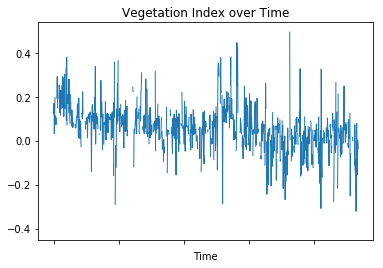

In [13]:
# plot a graph to see the missing values
sj_features_data.ndvi_ne.plot.line(lw=1)
plot.title('Vegetation Index over Time')
plot.xlabel('Time')

Fill missing Values

In [14]:
# fill missing values
sj_features_data.fillna(sj_features_data.interpolate(), inplace=True)
iq_features_data.fillna(iq_features_data.interpolate(), inplace=True)


/home/akalanka/.local/lib/python3.6/site-packages/pandas/core/frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


Plot a graph to see if missing values got filled

Text(0.5,0,'Time')

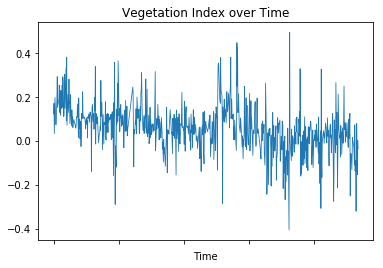

In [15]:
# plot a graph to see if the missing values filled properly
sj_features_data.ndvi_ne.plot.line(lw=0.8)
plot.title('Vegetation Index over Time')
plot.xlabel('Time')

## Data Integration

In [16]:
#Data Integration
sj_features_data_with_total_cases = pd.merge(sj_features_data, sj_labels_data,  on=["year", "weekofyear"])
iq_features_data_with_total_cases = pd.merge(iq_features_data, iq_labels_data,  on=["year", "weekofyear"])

In [18]:
#Check data Integration
print(sj_features_data_with_total_cases)



                  ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  precipitation_amt_mm  \
year weekofyear                                                                 
1990 18          0.122600  0.103725  0.198483  0.177617                 12.42   
     19          0.169900  0.142175  0.162357  0.155486                 22.82   
     20          0.032250  0.172967  0.157200  0.170843                 34.54   
     21          0.128633  0.245067  0.227557  0.235886                 15.36   
     22          0.196200  0.262200  0.251200  0.247340                  7.52   
     23          0.154550  0.174850  0.254314  0.181743                  9.58   
     24          0.112900  0.092800  0.205071  0.210271                  3.48   
     25          0.072500  0.072500  0.151471  0.133029                151.12   
     26          0.102450  0.146175  0.125571  0.123600                 19.32   
     27          0.147663  0.121550  0.160683  0.202567                 14.41   
     28          0.192875  0

In [19]:
print(iq_features_data_with_total_cases)

                  ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  precipitation_amt_mm  \
year weekofyear                                                                 
2000 26          0.192886  0.132257  0.340886  0.247200                25.410   
     27          0.216833  0.276100  0.289457  0.241657                60.610   
     28          0.176757  0.173129  0.204114  0.128014                55.520   
     29          0.227729  0.145429  0.254200  0.200314                 5.600   
     30          0.328643  0.322129  0.254371  0.361043                62.760   
     31          0.205529  0.190757  0.231671  0.255314                16.240   
     32          0.312486  0.329986  0.380586  0.387271                89.370   
     33          0.384133  0.392240  0.341780  0.382750                42.080   
     34          0.408157  0.322157  0.406714  0.302714                49.220   
     35          0.332043  0.321057  0.314614  0.324257                53.650   
     36          0.295586  0

# Feature Extraction

Finding the most influential features have to be identified. for this we need to find the correlation of each feature

In [20]:
# Next step is to finding the most related features
# feature extraction
sj_correlation  = sj_features_data_with_total_cases.corr()
iq_correlation  = iq_features_data_with_total_cases.corr()



Print results

In [21]:
print(sj_correlation)

                                        ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
ndvi_ne                                1.000000  0.632660  0.219353  0.181035   
ndvi_nw                                0.632660  1.000000  0.197311  0.217740   
ndvi_se                                0.219353  0.197311  1.000000  0.814621   
ndvi_sw                                0.181035  0.217740  0.814621  1.000000   
precipitation_amt_mm                  -0.047605 -0.039786 -0.118044 -0.116457   
reanalysis_air_temp_k                 -0.081418 -0.075590 -0.015274 -0.037803   
reanalysis_avg_temp_k                 -0.080099 -0.074222 -0.012803 -0.030719   
reanalysis_dew_point_temp_k           -0.044658 -0.024870 -0.063605 -0.082255   
reanalysis_max_air_temp_k             -0.054641 -0.042829 -0.009400 -0.008675   
reanalysis_min_air_temp_k             -0.090415 -0.074337 -0.046879 -0.067209   
reanalysis_precip_amt_kg_per_m2        0.012017  0.005710 -0.129374 -0.123098   
reanalysis_relative_humidity

In [22]:
print(iq_correlation)

                                        ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
ndvi_ne                                1.000000  0.764200  0.769360  0.842922   
ndvi_nw                                0.764200  1.000000  0.644541  0.765389   
ndvi_se                                0.769360  0.644541  1.000000  0.715192   
ndvi_sw                                0.842922  0.765389  0.715192  1.000000   
precipitation_amt_mm                  -0.009678 -0.058862 -0.040613 -0.018422   
reanalysis_air_temp_k                  0.153294  0.153033  0.196363  0.163957   
reanalysis_avg_temp_k                  0.169003  0.169819  0.208646  0.176896   
reanalysis_dew_point_temp_k           -0.033075 -0.036477 -0.063223 -0.033525   
reanalysis_max_air_temp_k              0.216933  0.206862  0.262470  0.231177   
reanalysis_min_air_temp_k             -0.005933  0.001565 -0.025163 -0.002881   
reanalysis_precip_amt_kg_per_m2       -0.082918 -0.076868 -0.122202 -0.064121   
reanalysis_relative_humidity

Lets look at the heat Map

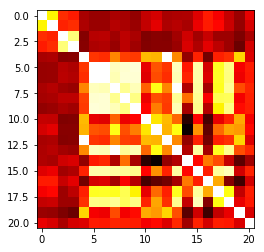

In [23]:
plot.imshow(sj_correlation, cmap= "hot")

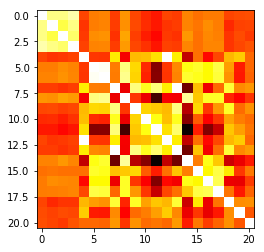

In [24]:
plot.imshow(iq_correlation, cmap= "hot")

Above maps display the correlations.

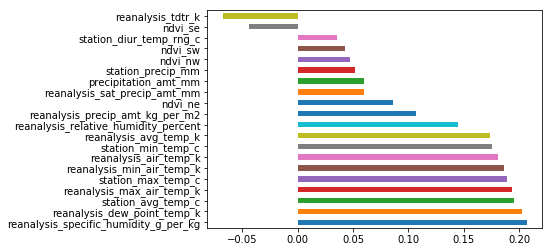

In [31]:
# plotting a bar graph
(sj_correlation.total_cases.drop('total_cases') .sort_values(ascending=False).plot.barh())


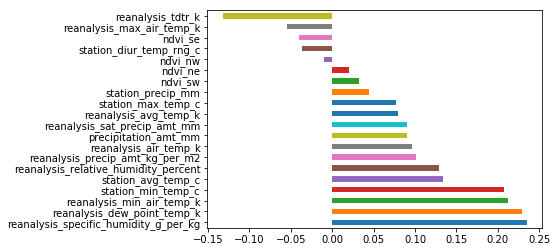

In [32]:
(iq_correlation.total_cases.drop('total_cases') .sort_values(ascending=False).plot.barh())


From these values we can identify the best fit features are 

                 'reanalysis_specific_humidity_g_per_kg', 
                 'reanalysis_dew_point_temp_k', 
                 'realanalysis_min_air_temp_k', 
                 'station_min_temp_c'
                 
We are going to use these to build the model.
